<a href="https://colab.research.google.com/github/Ayesha193/IntelOneAPI-TRUSTY/blob/main/IntelOneAPI_TRUSTY(Hackathon)_Insurance_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IntelOneAPI-Open Innovation Challenge**



**Team name:-BLAZER**

**INSURANCE FRAUD DETECTION**

**Introduction:-**
Many use pricey GPUs to shorten training and inference times for machine learning on industrial datasets that are getting bigger and bigger. Our project's demonstration will demonstrate how you may speed up your machine learning workflow utilising Intel's optimised libraries, which are both affordable and streamlined.

**IntelOneAPI toolkits:-**
This reference notebook will show you how to use multiple accelerated Python libraries included in the Intel® AI Analytics Toolkit to improve your ML workflow's training cycles, prediction throughput, and accuracy (AI Kit). The principal libraries we'll use in this notebook are:
1. Intel® Distribution of Modin*
2. Intel® Extension for Scikit-learn*

1.   XGBoost Optimized for Intel® Architecture
2. Intel® Daal4py



**About the project:-**
 In this project,I have demonstrated the results of our research by
automating the evaluation of insurance claims using a variety of data
methodologies, where the detection of erroneous claims would be done automatically using Data Analytics and Machine Learning techniques.Techniques such as **Logistic Regression,XGboosting and K-Means clustering** are used.

**Installations**:-

In [1]:
!pip install scikit-learn-intelex
!pip install modin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Hardware Requirements:-**
I have used 5th generation of Intel(R) Xeon(R) Core(TM) i5-10210U CPU @ 1.60GHz   2.11 GHz 

In [2]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

**The Intel® Distribution of Modin:-**It is  used to process and study the data first. With support for datasets from 1 MB to 1 TB+, the Intel® Distribution of Modin is a distributed DataFrame library created to expand your pandas process naturally with the size of your dataset. One core is used at a time with pandas. Modin's Dask* engine, on the other hand, utilises every available core, enabling you to work with very big datasets at significantly faster rates. Use the following code to use Modin with the Dask engine:

In [3]:
import modin.pandas as pd
from modin.config import Engine
Engine.put("dask") 

In [4]:
import os
import daal4py as d4p
from xgboost import XGBClassifier
import time
import warnings
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
warnings.filterwarnings('ignore')
pio.renderers.default='notebook' 
intel_pal, color=['#0071C5','#FCBB13'], ['#7AB5E1','#FCE7B2']
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))

**Dataset Description:**-The dataset was downloaded from Kaggle(InsuranceFraud.csv).https://www.kaggle.com/datasets/amanindiamuz/financial-dataset-for-fraud-detection-in-a-comapny  For further reference of the dataset visit my github

In [6]:
dataset=pd.read_csv("InsuranceFraud.csv")

In [7]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Exploratory data Analysis**

In [9]:
#checking how many frauds are there
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

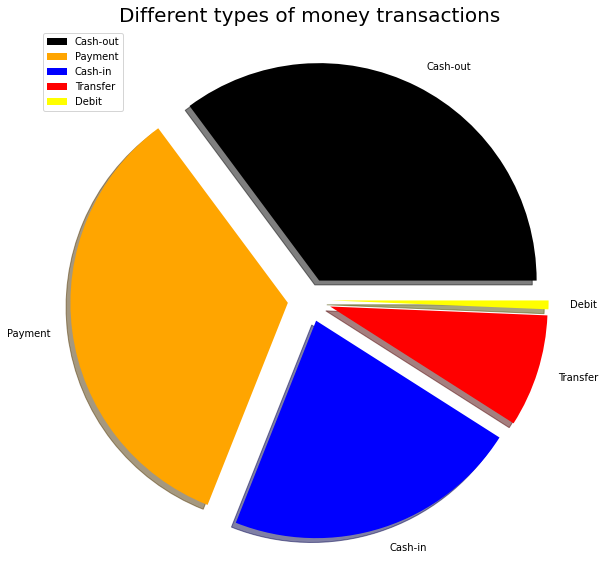

In [10]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['black', 'orange', 'blue', 'red', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('Different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [11]:
# checking the different types of steps involved in transactions

x = dataset['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)
     

The no. of different steps involved in transactions are : 428


**Normalization of the dataset**

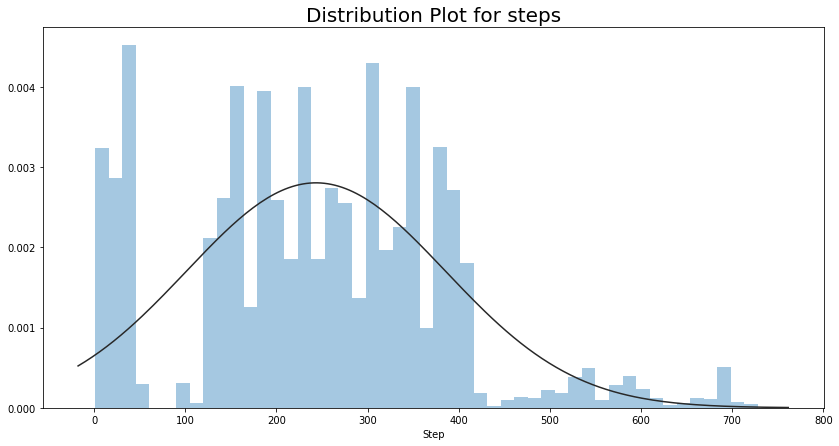

In [12]:
# setting the size of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(dataset.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

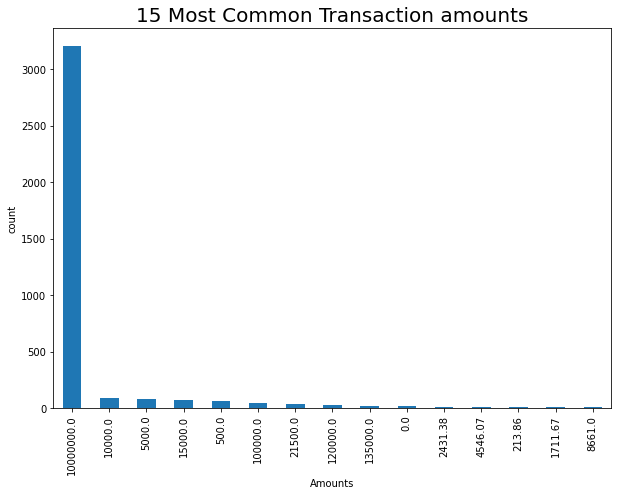

In [13]:
# checking the most common values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

dataset['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

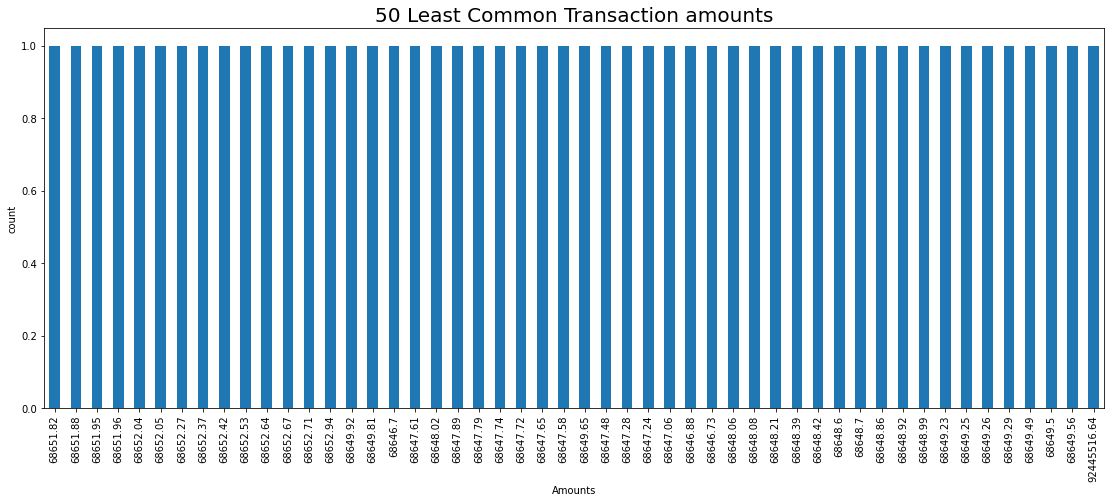

In [14]:
# checking the least common values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

dataset['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [15]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(dataset.loc[dataset.isFraud == 1].type.drop_duplicates().values)) )
     

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [16]:

# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
dfFraudCashout = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERS = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTS = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERS = 4097
The number of fraudulent CASH_OUTS = 4116


In [17]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", dataset.loc[dataset.isFlaggedFraud == 1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [18]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = dataset.loc[(dataset.isFlaggedFraud == 1) & (dataset.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", dataset.loc[dataset.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", dataset.loc[dataset.isFlaggedFraud == 1].amount.max())


The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [19]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = dataset.loc[(dataset.isFlaggedFraud == 0) & (dataset.oldbalanceDest == 0) & (dataset.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
5           1   PAYMENT     7817.71    C90045638       53860.00   
...       ...       ...         ...          ...            ...   
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0   

**Dataset where only Transfer Transactions are mentioned**

In [20]:
# defining a dataset containing only transfer type of transactions

dataTransfer = dataset.loc[dataset['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


**Minimum Original old Balance for Flagged Frauds**

In [21]:
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


**Maximum Original old Balance for Flagged Frauds**

In [22]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


**Minimum Original Old Balance for non-Flagged Frauds**

In [23]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996403,425,TRANSFER,10000000.0,C1619838170,39585040.37,29585040.37,C1934167334,0.0,0.0,1,0
6281476,646,TRANSFER,10000000.0,C130070267,40399045.08,30399045.08,C970791522,0.0,0.0,1,0
6266405,617,TRANSFER,10000000.0,C794290057,42542664.27,32542664.27,C262998076,0.0,0.0,1,0
5563705,387,TRANSFER,10000000.0,C576718894,44892193.09,34892193.09,C673002421,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362454,730,TRANSFER,10000000.0,C507645439,47316255.05,37316255.05,C270374999,0.0,0.0,1,0
5996401,425,TRANSFER,10000000.0,C1551381510,49585040.37,39585040.37,C1042012237,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0


**Maximum Original Old Balance for Non-Flagged Frauds**

In [24]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996403,425,TRANSFER,10000000.0,C1619838170,39585040.37,29585040.37,C1934167334,0.0,0.0,1,0
6281476,646,TRANSFER,10000000.0,C130070267,40399045.08,30399045.08,C970791522,0.0,0.0,1,0
6266405,617,TRANSFER,10000000.0,C794290057,42542664.27,32542664.27,C262998076,0.0,0.0,1,0
5563705,387,TRANSFER,10000000.0,C576718894,44892193.09,34892193.09,C673002421,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362454,730,TRANSFER,10000000.0,C507645439,47316255.05,37316255.05,C270374999,0.0,0.0,1,0
5996401,425,TRANSFER,10000000.0,C1551381510,49585040.37,39585040.37,C1042012237,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0


In [25]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = dataset.loc[dataset.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 19585040.37


In [26]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      dataset[(dataset.type == 'TRANSFER') & (dataset.isFlaggedFraud == 0) & (dataset.oldbalanceOrg == dataset.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      dataset[(dataset.type == 'TRANSFER') & (dataset.isFlaggedFraud == 0) & (dataset.oldbalanceOrg == dataset.newbalanceOrig)].oldbalanceOrg.max())


Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [27]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      dataset[(dataset.type == 'TRANSFER') & (dataset.isFlaggedFraud == 1) & (dataset.oldbalanceOrg == dataset.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      dataset[(dataset.type == 'TRANSFER') & (dataset.isFlaggedFraud == 1) & (dataset.oldbalanceOrg == dataset.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: 353874.22
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 19585040.37


In [28]:
# making dependent and independent sets

X = dataset.loc[(dataset.type == 'TRANSFER') | (dataset.type == 'CASH_OUT')]

# shape of x
X.shape


(2770409, 11)

In [29]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [30]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [31]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

In [32]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)
X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [33]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

False

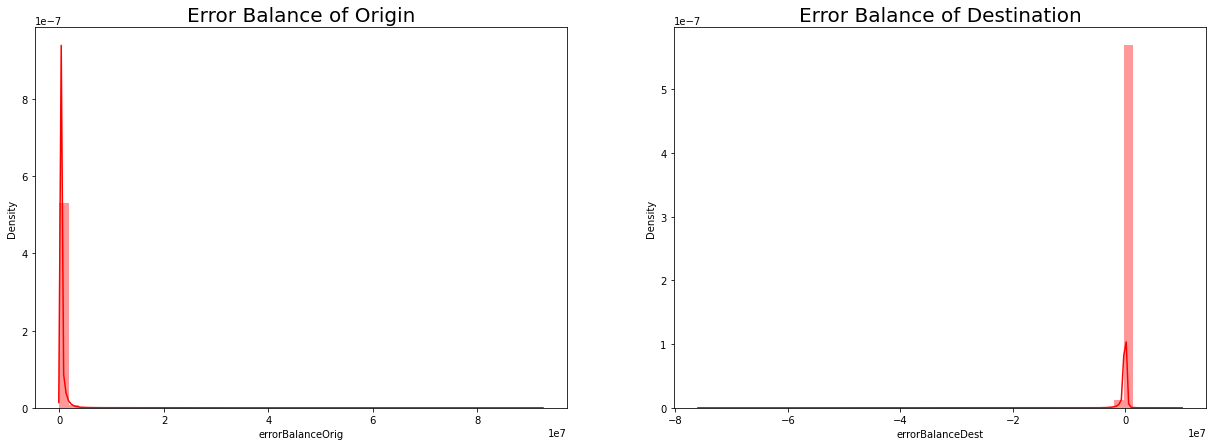

In [34]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

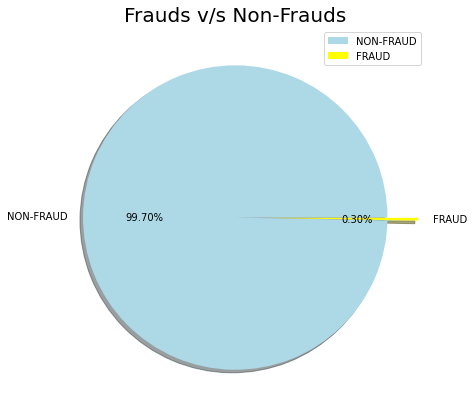

In [35]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()

# plotting a pie chart to represent the fraction of the frauds 

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [36]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [37]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(X,Y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (5524392, 10)
Shape of y: (5524392,)


**Intel® Extension for Scikit-learn:**-For Intel® CPUs and GPUs in single- and multi-node setups, the Intel® Extension for Scikit-learn delivers seamless integration with scikit-learn applications while shortening algorithm run times. You only need to call the patch sklearn() function,to take advantage of the accelerations and keep utilising the same scikit-learn libraries and AI software without making any additional modifications to your code. The optimised versions of the available standard scikit-learn algorithms will be replaced by the patch.

In [38]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [76]:
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [40]:
# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler,RobustScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**K-Means Clustering**

Converting categorical values to numerical values(integers)

In [41]:
y = dataset['type']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['type'] = le.fit_transform(dataset['type'])
y = le.transform(y)

In [42]:
y = dataset['nameOrig']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['nameOrig'] = le.fit_transform(dataset['nameOrig'])
y = le.transform(y)

In [43]:
y = dataset['nameDest']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['nameDest'] = le.fit_transform(dataset['nameDest'])
y = le.transform(y)

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
kmeans.fit(dataset)

KMeans(n_clusters=15)

In [45]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 8 out of 6362620 samples were correctly labeled.


In [46]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.00


Since the accuracy score is 0.0 and this algoirthm doesn't suit this dataset,I need not use the Intel® Daal4py library for kmeansClustering. If your dataset suits K-means clustering use  Intel(R) oneAPI Data Analytics Library K-Means Initialization.

**Linear Regression**

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(x_resample, y_resample)

LinearRegression()

In [49]:
r_sq = model.score(x_resample, y_resample)
print(f"Accuracy score(Linear Regression): {r_sq}")

Accuracy score(Linear Regression): 0.36759377404639515


Still the accuracy score is less and not up to the mark.I will try with **LogisticRegression** Algorithm and predict the accuracy score.

**Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_resample, y_resample)

LogisticRegression(random_state=0)

In [51]:
y_pred = classifier.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[551538   1582]
 [254047 297712]]


In [53]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7686362036023854


Now,we can see an improvement in accuracy score but still we can apply other algorithms.I will go with **XGB Algorithms**

Since XGBoost version 0.81, Intel® has added numerous optimizations to the package that were upstreamed in order to maximise training performance.

After identifying the ideal XGBoost model hyperparameters, we will switch the model over to a daal4py model to achieve even better prediction time performance. The Intel® Advanced Vector Extensions (Intel® AVX-512) hardware is used by Daal4py, which may be obtained from the Intel® oneAPI Data Analytics Library (oneDAL), to enhance gradient boosting performance on Intel® Xeon® processors.

In [55]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Accuracy Score(XGBClassifier) is", auprc)

[19:17:10] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
The Accuracy Score(XGBClassifier) is 0.9980061246388607


In [56]:
import time
start = time.time()
XGBClassifier(2500)
end = time.time()
total_time = end - start
print("\n The performance time without using Intel® Daal4py library"+ str(total_time))


 The performance time without using Intel® Daal4py library0.00013256072998046875


**Using Intel® Daal4py library:-**With the help of the get gbt model from xgboost() method, it is quite simple to convert a tuned XGBoost model to Daal4py in just one line of code. The probabilities on the test set can then be calculated using Daal4py's prediction function by sending the trained model along with the input data.

In [88]:
def prepare_train_test_data(data, target_col, test_size):
    
    """
    Function to scale and split the data into training and test sets
    """
    
    scaler = RobustScaler()   
    X = dataset.drop(target_col, axis=1)
    y = dataset[target_col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=21)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    print("Train Shape: {}".format(x_train_scaled.shape))
    print("Test Shape: {}".format(x_test_scaled.shape))
    
    return x_train_scaled, x_test_scaled, y_train, y_test

**GradientBoostingAlgorithm**

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier=GradientBoostingClassifier(n_estimators=20,learning_rate=0.1,max_features=2,max_depth=2,random_state=0)
gb_model=gb_classifier.fit(x_train,y_train)
print("train score :"+str(gb_model.score(x_train,y_train)))
print("test score :"+str(gb_model.score(x_test,y_test)))

train score :0.9656247192846814
test score :0.9654821930727256


In [ ]:
## Initialize XGBoost model ##
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
parameters = {'scale_pos_weight': ratio.round(2), 
                'tree_method': 'hist',
                'random_state': 21}
xgb_model = XGBClassifier(**parameters)

## Tune hyperparameters ##
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=21)
print("\nTuning hyperparameters..")
grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5],
        }

grid_search = GridSearchCV(xgb_model, param_grid=grid, 
                            cv=strat_kfold, scoring='roc_auc', 
                            verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Done!\nBest hyperparameters:", grid_search.best_params_)
print("Best cross-validation AUC: {:.4f}".format(grid_search.best_score_))

In [59]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import average_precision_score

model = XGBRegressor()
model.fit(x_test, y_test)

y_pred = model.predict(x_test)

## Convert XGB model to daal4py ##
xgb = grid_search.best_estimator_
daal_model = d4p.get_gbt_model_from_xgboost(xgb.get_booster())

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Accuracy Score(XGBRegressor) is", auprc)

[20:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Accuracy Score(XGBRegressor) is 0.99982453235433


In [60]:
import time
start = time.time()
XGBRegressor(2500)
end = time.time()
total_time = end - start
print("\n The performance time using Intel® Daal4py library"+ str(total_time))


 The performance time using Intel® Daal4py library0.00010061264038085938


We can conclude that after using Intel® Daal4py library,the execution time is lesser than before.It gives **predictions with better time performances.**Now the accuracy score is almost 1,so we can conclude that **XGB algorithm** suits this dataset.